In [ ]:
#read files
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/ML/hr_data.csv'
import pandas as pd
df  = pd.read_csv(path)
print(df.shape)
print(df.dtypes)
print(df.columns)
print(df.isnull().sum())

Mounted at /content/drive
(11999, 11)
Unnamed: 0                 int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
position                  object
salary                    object
left                       int64
dtype: object
Index(['Unnamed: 0', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'position', 'salary', 'left'],
      dtype='object')
Unnamed: 0               0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
position                 0
salary                   0
left                     0
dtype: int64


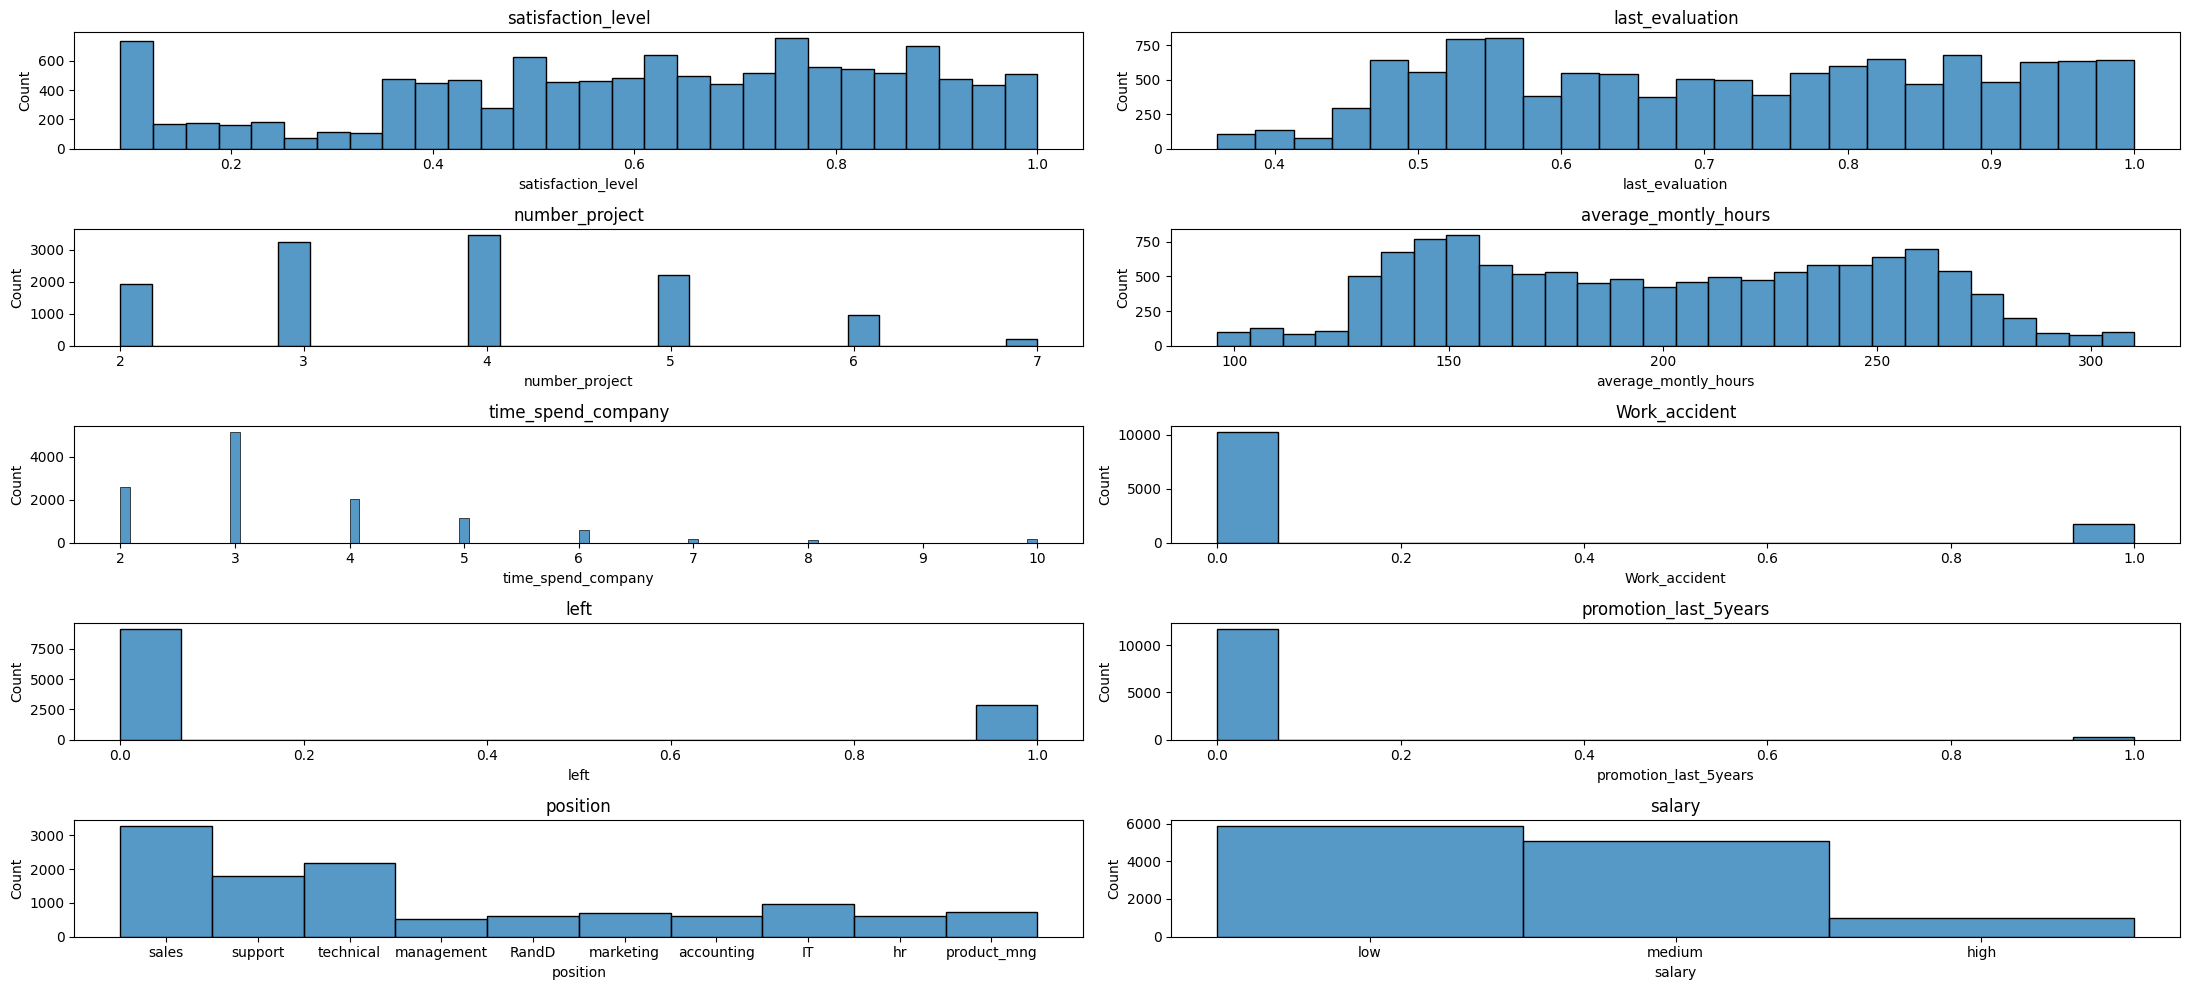

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Specify the columns for which you want to create histograms
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
           'average_montly_hours', 'time_spend_company', 'Work_accident',
           'left', 'promotion_last_5years','position','salary']

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(22, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms for each column
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, ax=ax) #kde=True
    ax.set_title(column)

# Set tight layout
plt.tight_layout()

# Show the plot
plt.show()

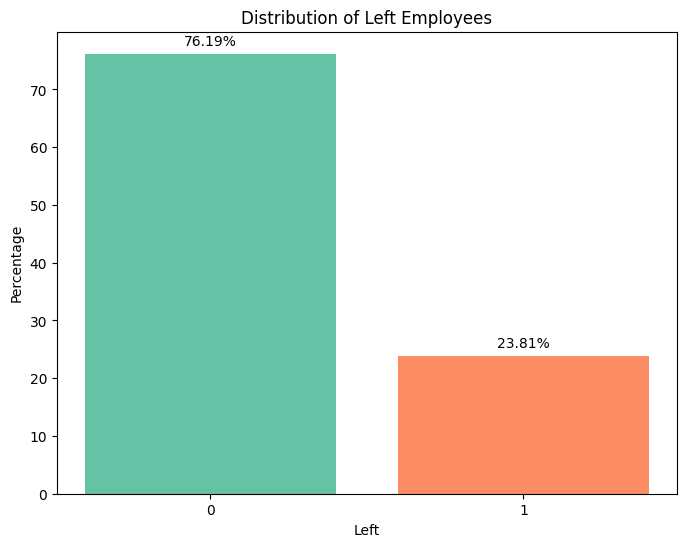

In [ ]:
import seaborn as sns
# Calculate the percentage distribution of the 'left' column
left_counts = df['left'].value_counts(normalize=True) * 100

# Create a bar plot
colors = sns.color_palette('Set2', n_colors=len(left_counts))
plt.figure(figsize=(8, 6))
bars = plt.bar(left_counts.index.astype(str), left_counts.values , color = colors)
# Define custom colors for the bars


# Add labels and title
plt.xlabel('Left')
plt.ylabel('Percentage')
plt.title('Distribution of Left Employees')

# Add percentages as text on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
Ordinal_encoder = OrdinalEncoder()
# Fit and transform the 'position' column
df['position'] = label_encoder.fit_transform(df['position'])
df['salary']=Ordinal_encoder.fit_transform(df['salary'].values.reshape(-1, 1))

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,f_classif

In [ ]:
import numpy as np
# Specify the columns you want to extract
num = df[['satisfaction_level', 'last_evaluation', 'number_project',
          'average_montly_hours', 'time_spend_company', 'Work_accident',
          'promotion_last_5years']]

# Extract the data from the specified columns and convert it to a NumPy array
#df_num = df[num].to_numpy()

y = df[['left']]
#df_y = df[y].to_numpy()

In [ ]:
selector = SelectKBest(f_classif,k= 'all')
selector.fit(num,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k='all')

In [ ]:
names = num.columns[selector.get_support()]
f_scores = selector.scores_
p_values = selector.pvalues_
feature_names = num.columns

# Create a dictionary to store feature names, their corresponding F-scores, and p-values
feature_score_dict = {feature_names[i]: {'F-score': f_scores[i], 'p-value': p_values[i]} for i in range(len(feature_names))}

# Convert the dictionary into a DataFrame for better visual presentation
feature_scores_df = pd.DataFrame.from_dict(feature_score_dict, orient='index')

# Sort the DataFrame by F-scores in descending order
sorted_features_df = feature_scores_df.sort_values(by='F-score', ascending=False)

# Display the sorted DataFrame
print(sorted_features_df)

                           F-score       p-value
satisfaction_level     2084.406612  0.000000e+00
Work_accident           290.626058  2.077823e-64
time_spend_company      256.273452  4.339696e-57
average_montly_hours     59.783974  1.143010e-14
promotion_last_5years    39.961147  2.682522e-10
number_project            5.303739  2.129672e-02
last_evaluation           0.507938  4.760468e-01


In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table for 'salary' and 'left'
contingency_table_salary = pd.crosstab(df['salary'], df['left'])

# Chi-squared test for 'salary' and 'left'
chi2_salary, p_salary, dof_salary, expected_salary = chi2_contingency(contingency_table_salary)
print(f"Salary vs Left - Chi-squared: {chi2_salary}, p-value: {p_salary}")

# Calculate Cramer's V for 'salary' and 'left'
n_salary = contingency_table_salary.sum().sum()  # Total observations
min_dim_salary = min(contingency_table_salary.shape) - 1  # Minimum dimension
cramers_v_salary = np.sqrt(chi2_salary / (n_salary * min_dim_salary))
print(f"Salary vs Left - Cramer's V: {cramers_v_salary}")

# Create a contingency table for 'position' and 'left'
contingency_table_position = pd.crosstab(df['position'], df['left'])

# Chi-squared test for 'position' and 'left'
chi2_position, p_position, dof_position, expected_position = chi2_contingency(contingency_table_position)
print(f"Position vs Left - Chi-squared: {chi2_position}, p-value: {p_position}")

# Calculate Cramer's V for 'position' and 'left'
n_position = contingency_table_position.sum().sum()  # Total observations
min_dim_position = min(contingency_table_position.shape) - 1  # Minimum dimension
cramers_v_position = np.sqrt(chi2_position / (n_position * min_dim_position))
#print(f"Position vs Left - Cramer's V: {cramers_v_position}")

# Data
data = {
    'Metric': ['Chi-squared', 'p-value'],
    'Salary vs Left': [381.22504706621066, '1.652e-83'],
    'Position vs Left': [86.82547426790299, '7.042e-15']
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Set 'Metric' as index to display as row labels
results_df.set_index('Metric', inplace=True)

# Print the DataFrame
print(results_df)

Salary vs Left - Chi-squared: 291.31918951589347, p-value: 5.506070405406523e-64
Salary vs Left - Cramer's V: 0.1558159887330347
Position vs Left - Chi-squared: 77.24387034220588, p-value: 5.689535494264675e-13
            Salary vs Left Position vs Left
Metric                                     
Chi-squared     381.225047        86.825474
p-value          1.652e-83        7.042e-15


In [ ]:
# Adjust display settings for compact display
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Use maximum screen width
pd.set_option('display.precision', 2)       # Set precision for floating points

# Print the descriptive statistics
print(df.describe())

       Unnamed: 0  satisfaction_level  last_evaluation  number_project  average_montly_hours  \
count    11999.00            11999.00         11999.00        11999.00              11999.00   
mean      7485.30                0.61             0.72            3.80                200.98   
std       4331.22                0.25             0.17            1.23                 49.94   
min          0.00                0.09             0.36            2.00                 96.00   
25%       3738.50                0.44             0.56            3.00                156.00   
50%       7467.00                0.64             0.72            4.00                200.00   
75%      11240.50                0.82             0.87            5.00                245.00   
max      14998.00                1.00             1.00            7.00                310.00   

       time_spend_company  Work_accident  promotion_last_5years  position    salary      left  
count            11999.00       11999.0

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
min_max_scaler = MinMaxScaler()

# List of columns to scale
columns_to_scale = ['number_project','average_montly_hours', 'time_spend_company']

# Check if all columns exist in the DataFrame to avoid KeyError

df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])


In [ ]:
x = df[['satisfaction_level', 'number_project',
           'average_montly_hours', 'time_spend_company', 'Work_accident',
           'promotion_last_5years','position','salary']]
y = df[['left']]
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Define the list of classifiers
classifiers = [
    RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    AdaBoostClassifier(),
    SVC(),
    LinearSVC(),
    NuSVC(nu=0.01),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier()
]

name = []
score = []
models = []
accuracy = []
i = 0

# Assuming X_train, X_test, y_train, y_test have been defined
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    name.append(type(classifier).__name__)
    prediction = classifier.predict(x_test)
    score.append(classifier.score(x_test, y_test))
    models.append(classifier)
    accuracy.append(accuracy_score(y_test, prediction))

# Optionally, print results for each model
#for i in range(len(classifiers)):
   # print(f"{name[i]}: Accuracy = {score[i]:.5f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-9-dcc1189847d3>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_

[LightGBM] [Info] Number of positive: 2143, number of negative: 6856
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 8999, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238138 -> initscore=-1.162917
[LightGBM] [Info] Start training from score -1.162917


In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)  # Adjust this for the number of decimal places you need
#pd.set_option('display.max_colwidth', None)  # Ensure full display of the model descriptions

# Create the DataFrame
df_score = pd.DataFrame(list(zip(name, accuracy, models)), columns=['name', 'accuracy', "model"])
df_score.set_index('name', inplace=True)
df_score.sort_values(by='accuracy', inplace=True, ascending=False)

# Display the DataFrame
df_score

,accuracy,model
name,,
RandomForestClassifier,0.988667,"(DecisionTreeClassifier(max_features='sqrt', r..."
XGBClassifier,0.985667,"XGBClassifier(base_score=None, booster=None, c..."
LGBMClassifier,0.985000,LGBMClassifier()
DecisionTreeClassifier,0.975333,DecisionTreeClassifier()
GradientBoostingClassifier,0.974667,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoostClassifier,0.960667,"(DecisionTreeClassifier(max_depth=1, random_st..."
KNeighborsClassifier,0.942000,KNeighborsClassifier()
RidgeClassifierCV,0.776333,"RidgeClassifierCV(alphas=[0.001, 0.01, 0.1, 1])"
LinearSVC,0.771333,LinearSVC()


In [ ]:
path = '/content/drive/My Drive/ML/x_pred.csv'
sub_x  = pd.read_csv(path)

In [ ]:
submission_x = sub_x[['satisfaction_level', 'number_project',
          'average_montly_hours', 'time_spend_company', 'Work_accident',
          'promotion_last_5years','position','salary']]

In [ ]:
modelselected = RandomForestClassifier()
modelselected.fit(X_train, y_train)
predict =  modelselected.predict(submission_x)
submission = pd.DataFrame({
    "attrition": predict
})
path = '/content/drive/My Drive/ML/attrition_prediction.csv'
submission.to_csv(path)

<ipython-input-17-35803dd3bcdc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelselected.fit(X_train, y_train)
